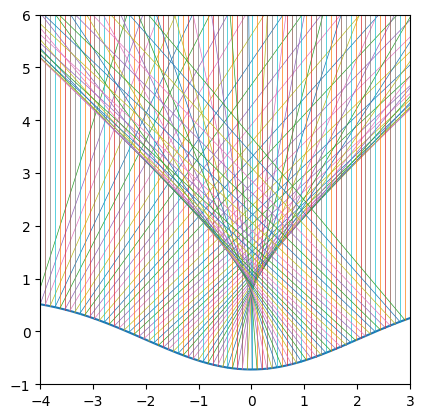

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 16 16:44:42 2021
 
raycaustic.py
 
@author: nolte
 
D. D. Nolte, Optical Interferometry for Biology and Medicine (Springer,2011)
"""
 
import numpy as np
from matplotlib import pyplot as plt
 
plt.close('all')
 
# model_case 1 = cosine
# model_case 2 = circle
# model_case 3 = square root
# model_case 4 = inverse power law
# model_case 5 = ellipse
# model_case 6 = secant
# model_case 7 = parabola
# model_case 8 = Cauchy
 
#model_case = int(input('Input Model Case (1-9)'))
model_case = 9
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if model_case == 1:
    model_title = 'cosine'
    xleft = -np.pi
    xright = np.pi
    ybottom = -1
    ytop = 1.2
 
elif model_case == 2:
    model_title = 'circle'
    xleft = -1
    xright = 1
    ybottom = -1
    ytop = .2
 
elif model_case == 3:
    model_title = 'square-root'
    xleft = 0
    xright = 4
    ybottom = -2
    ytop = 2
 
elif model_case == 4:
    model_title = 'Inverse Power Law'
    xleft = 1e-6
    xright = 4
    ybottom = 0
    ytop = 4
     
elif model_case == 5:
    model_title = 'ellipse'
    a = 0.5
    b = 2
    xleft = -b
    xright = b
    ybottom = -a
    ytop = 0.5*b**2/a
     
elif model_case == 6:
    model_title = 'secant'
    xleft = -np.pi/2
    xright = np.pi/2
    ybottom = 0.5
    ytop = 4
     
elif model_case == 7:
    model_title = 'Parabola'
    xleft = -2
    xright = 2
    ybottom = 0
    ytop = 4
 
elif model_case == 8:
    model_title = 'Cauchy'
    xleft = 0
    xright = 4
    ybottom = 0
    ytop = 4

elif model_case == 9:
    dist = 7
    model_title = 'Libby'
    xleft = -4
    xright = xleft + dist
    ybottom = -1
    ytop = ybottom + dist
     
def feval(x):
 
    if model_case == 1:
        y = -np.cos(x)
 
    elif model_case == 2:
        y = -np.sqrt(1-x**2)
 
    elif model_case == 3:
        y = -np.sqrt(x)
         
    elif model_case == 4:
        y = x**(-0.75)
         
    elif model_case == 5:
        y = -a*np.sqrt(1-x**2/b**2)
 
    elif model_case == 6:
        y = 1.0/np.cos(x)
 
    elif model_case == 7:
        y = 0.5*x**2 
         
    elif model_case == 8:
        y = 1/(1 + x**2)

    elif model_case == 9:
        d_medios= 5 #nm
        d = d_medios * 2 #distancia en que se repite una oscilación
        n1 = 0.66 #nm amplitude
        n2 = -0.06 #nm
        #f = -0.82 #scale factor
        f = 1 #scale factor
        p = 1*np.pi #phase shift
        #y = (n1* np.cos(x-p) + n2*np.cos(2*x))*f
        y = (n1* np.cos(2*np.pi/d *x-p) + n2*np.cos(2*np.pi/d *(2*x)))*f
    return y




xx = np.arange(xleft,xright,0.01)
yy = feval(xx)
#interact(feval, n1=(1, 10, 0.1), n2=(1, 5, 0.5),f=(1, 5, 0.5), p=(1, 5, 0.5))

plt.figure()
lines = plt.plot(xx,yy)
plt.xlim(xleft, xright)
plt.ylim(ybottom, ytop)
 
delx = 0.001
N = 75
 
for i in range(N+1):
     
    x = xleft + (xright-xleft)*(i-1)/N
     
    val = feval(x)
    valp = feval(x+delx/2)
    valm = feval(x-delx/2)
    deriv = (valp-valm)/delx
     
    phi = np.arctan(deriv)
    slope =  np.tan(np.pi/2 + 2*phi)
 
    if np.abs(deriv) < 1:
        xf = (ytop-val+slope*x)/slope;
        yf = ytop;
    else:
        xf = (ybottom-val+slope*x)/slope;
        yf = ybottom;
    plt.plot([x, x],[ytop, val],linewidth = 0.5)       
    plt.plot([x, xf],[val, yf],linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')      
plt.savefig("caustics.svg")
plt.show()




In [7]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def plot_sine_wave(freq, amp):
    x = np.linspace(0, 10, 100)
    y = amp * np.sin(freq * x)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f'Sine Wave: Amplitude={amp}, Frequency={freq}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    
    plt.show()




In [8]:
interact(plot_sine_wave, freq=(1, 10, 0.1), amp=(1, 5, 0.5))

interactive(children=(FloatSlider(value=5.0, description='freq', max=10.0, min=1.0), FloatSlider(value=3.0, de…

<function __main__.plot_sine_wave(freq, amp)>